In [3]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline 

### 1.) 

#### Optimal policy $\pi$

We can find the optimal policy $\pi$ though $\pi^{opt}(x) = \text{arg}\underset{a}{\text{max}}Q(x,a)$

Where,
\begin{align}
Q(x,a) &= \mathbf{E}(Y | X=x,A=a) \\
       &= \beta_0 + \beta_1 a + \beta_2 x + \beta_3 a x \\
       &=  1 + a + x +  2 a x 
\end{align}

Since, $\text{arg}\underset{a}{\text{max}}Q(x,a)$ only depends on a, this reduces to 
\begin{align}
\pi^{opt}(x) = \text{arg}\underset{a}{\text{max}}\{ a + 2 a x \} \\
             = \text{arg}\underset{a}{\text{max}}\{ a( 1 + 2x )\}
\end{align}

Since $a \in \{0, 1\}$, this is clealy maxized for
\begin{equation*}
a =\begin{cases}
          0 \quad &\text{if} \, 1 + 2x < 0 \\
          1 \quad &\text{if} \, 1 + 2x > 0 \\
     \end{cases}
\end{equation*}

Therefore $\pi^{opt}(x) = \textbf{1}_{X > -0.5}$


#### Simulation

In [5]:
# Set up parameters
n = 500
β = np.array([1,1,1,2])
τ = [0.025, .01]
α_10 = np.zeros((1000, 2))
α_5  = np.zeros((1000, 2))
α_1  = np.zeros((1000, 2))
β3_pval =  np.zeros((1000, 2))

In [6]:
np.random.seed(1234)
for j, τi in enumerate(τ):
    for i in range(1000):
        x_5 = np.random.randn(n)

        X = x_5 ** 5
        A = np.abs(X) <= τi
        ϵ = np.random.rand(n)

        D = np.c_[np.ones_like(X), A, X, A*X]
        Y = D @ β + ϵ

        ols = sm.OLS(Y, D)
        res = ols.fit()
        pvals = res.pvalues

        
        α_5[i,j]  = pvals[3] < .025
       
        β3_pval[i,j] = pvals[3]

In [7]:
α_5.mean(axis=0)

array([0.07 , 0.038])

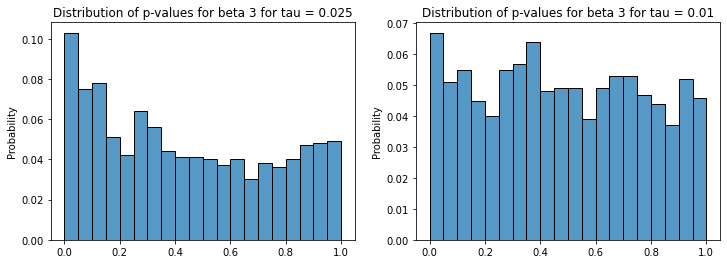

In [8]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plot1 = sns.histplot(β3_pval[:,0], stat='probability', binwidth=0.05)
plot1.set_title("Distribution of p-values for beta 3 for tau = 0.025")

plt.subplot(122)
plot2 = sns.histplot(β3_pval[:,1], stat='probability', binwidth=0.05)
plot2.set_title("Distribution of p-values for beta 3 for tau = 0.01")
pass

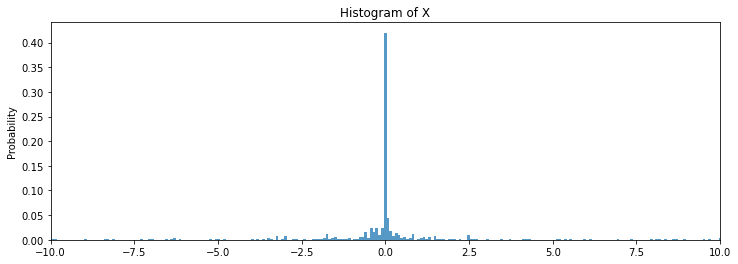

In [82]:
plt.figure(figsize=(12,4))
plot = sns.histplot(X, stat='probability')
plt.xlim([-10, 10])
plot.set_title("Histogram of X")
pass

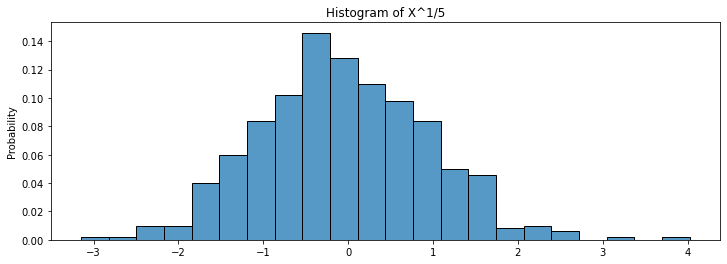

In [79]:
plt.figure(figsize=(12,4))
plot = sns.histplot(x_5, stat='probability')
plot.set_title("Histogram of X^1/5")
pass

In this case $X^{1/5} \sim \text{N}(0,1)$ so the distribution of X is either tight concentrated around 0 or pushed far out to its tails for $|X| > 1$. The action $A = \textbf{1}_{|X|<\tau}$, for $\tau \in \{0.025 , 0.01\}$. Therefore A is only 1 for values of X close to 0 and is 0 for a large percentage of X. Since $0.01^{1/5} \approx 0.39$ and $0.025^{1/5} \approx 0.478$, if we relate this back to the standard normal we see that are large portion of the distribution now becomes 0. So $\beta_3$ is measuring an interaction that is either near 0 or exaclty 0.

The standard causal assumptions are not verified. We do not have positivity since $P(A=1 | |X| > \tau) = 0$ for a large portion of the distribution of X. Therefore it does not hold that $P(A=1 | X = x) > \epsilon$ for some $\epsilon >0$ for almost all $x$.